In [ ]:
# Import necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import  MinMaxScaler

plt.style.use('seaborn')

# **Load the Data**

In [ ]:
data_source = "marketing_campaign.csv"
all_data = pd.read_csv(data_source)
print(f"#rows: {all_data.shape[0]} #cols: {all_data.shape[1]}")
all_data.head()

#rows: 2240 #cols: 29


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
all_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
all_data["Teenhome"].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

# **Data Preprocessing**

In [ ]:
# Homes with 2 teens are also part of a teenhome, hence replacing values 2 to 1 to make our task a binary classification
all_data["Teenhome"] = all_data["Teenhome"].replace({2:1})

In [ ]:
all_data["Teenhome"].value_counts()

0    1158
1    1082
Name: Teenhome, dtype: int64

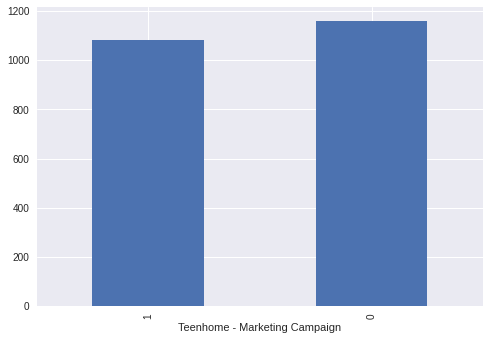

In [ ]:
all_data.Teenhome.value_counts().sort_values().plot(kind = 'bar',xlabel='Teenhome - Marketing Campaign')

In [ ]:
all_data["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
# 1 if likely to have kids else 0
marital_status_mapping = {'Married': 1, 'Together': 1, 'Single': 0, 'Divorced': 1, 'Widow': 1, 'Alone': 0, 
                          'Absurd': 0, 'YOLO': 0 }
all_data["Marital_Status"] = all_data['Marital_Status'].map(marital_status_mapping)
all_data["Marital_Status"].value_counts()

1    1753
0     487
Name: Marital_Status, dtype: int64

In [ ]:
# calculating age from year of birth feature and renaming column name to Age
all_data["Year_Birth"] = 2021 - all_data['Year_Birth']


In [ ]:
all_data = all_data.rename({'Year_Birth': 'Age'},axis=1)
all_data.head()
#do scaling, remove outliers

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,64,Graduation,0,58138.0,0,0,04/09/12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,67,Graduation,0,46344.0,1,1,08/03/14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,56,Graduation,1,71613.0,0,0,21/08/13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,37,Graduation,1,26646.0,1,0,10/02/14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,40,PhD,1,58293.0,1,0,19/01/14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# 1 = undergrad, 2 = grad, 3 = postgrad
all_data["Education"] = all_data["Education"].replace({"Basic":"1",
                                               "2n Cycle":"1", 
                                               "Graduation":"2", 
                                               "Master":"3", 
                                               "PhD":"3"})

In [ ]:
all_data["Education"].value_counts()

2    1127
3     856
1     257
Name: Education, dtype: int64

In [ ]:
# converting date to a numeric pandas date format
all_data["Dt_Customer"] = pd.to_datetime(all_data["Dt_Customer"])

In [ ]:
all_data.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,64,2,0,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,67,2,0,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,56,2,1,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,37,2,1,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,40,3,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
all_data.nunique()

ID                     2240
Age                      59
Education                 3
Marital_Status            2
Income                 1974
Kidhome                   3
Teenhome                  2
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
# Dropping columns Z_Revenue and Z_CostContact because they contain only one unique value. 
all_data = all_data.drop(['Z_Revenue', 'Z_CostContact'],axis=1)

In [ ]:
all_data.nunique()

ID                     2240
Age                      59
Education                 3
Marital_Status            2
Income                 1974
Kidhome                   3
Teenhome                  2
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [ ]:
# Generating a new column SweetPurchase. Intuition: assuming teenhomes might spend more on sweet products 
all_data['SweetPurchases'] = all_data['MntFruits'] + all_data['MntSweetProducts']

In [ ]:
# Combining all household spends. Teenhome likely to spend more than single because of less family size. 
all_data["Spent"] = all_data["MntWines"]+ all_data["MntFruits"]+ all_data["MntMeatProducts"]
+ all_data["MntFishProducts"]+ all_data["MntSweetProducts"]+ all_data["MntGoldProds"]

0       348
1         9
2       174
3        18
4        88
       ... 
2235    407
2236      8
2237     68
2238    171
2239     24
Length: 2240, dtype: int64

In [ ]:
all_data = all_data.drop(['MntFruits','MntSweetProducts'],axis=1)

In [ ]:
# Combining all accepted discount offers. Again, teenhomes might look more for discounts compared to single people
all_data['TotalAcceptedOffers'] = all_data['AcceptedCmp1'] + all_data['AcceptedCmp2'] + all_data['AcceptedCmp3']
+ all_data['AcceptedCmp4'] + all_data['AcceptedCmp5'] + all_data['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    1
Length: 2240, dtype: int64

In [ ]:
all_data = all_data.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1)
all_data.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntMeatProducts,MntFishProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,SweetPurchases,Spent,TotalAcceptedOffers
0,5524,64,2,0,58138.0,0,0,2012-04-09,58,635,546,172,88,3,8,10,4,7,0,1,176,1269,0
1,2174,67,2,0,46344.0,1,1,2014-08-03,38,11,6,2,6,2,1,1,2,5,0,0,2,18,0
2,4141,56,2,1,71613.0,0,0,2013-08-21,26,426,127,111,42,1,8,2,10,4,0,0,70,602,0
3,6182,37,2,1,26646.0,1,0,2014-10-02,26,11,20,10,5,2,2,0,4,6,0,0,7,35,0
4,5324,40,3,1,58293.0,1,0,2014-01-19,94,173,118,46,15,5,5,3,6,5,0,0,70,334,0


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Age                  2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   int64         
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

In [ ]:
# 24 income values missing, replacing with column mean" 
all_data['Income'] = all_data['Income'].fillna(all_data['Income'].mean())

In [ ]:
all_data.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntMeatProducts,MntFishProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,SweetPurchases,Spent,TotalAcceptedOffers
0,5524,64,2,0,58138.0,0,0,2012-04-09,58,635,546,172,88,3,8,10,4,7,0,1,176,1269,0
1,2174,67,2,0,46344.0,1,1,2014-08-03,38,11,6,2,6,2,1,1,2,5,0,0,2,18,0
2,4141,56,2,1,71613.0,0,0,2013-08-21,26,426,127,111,42,1,8,2,10,4,0,0,70,602,0
3,6182,37,2,1,26646.0,1,0,2014-10-02,26,11,20,10,5,2,2,0,4,6,0,0,7,35,0
4,5324,40,3,1,58293.0,1,0,2014-01-19,94,173,118,46,15,5,5,3,6,5,0,0,70,334,0


In [ ]:
all_data[['Age','Income']].describe()

,Age,Income
count,2240.000000,2240.000000
mean,52.194196,52247.251354
std,11.984069,25037.797168
min,25.000000,1730.000000
25%,44.000000,35538.750000
50%,51.000000,51741.500000
75%,62.000000,68289.750000
max,128.000000,666666.000000


### Outlier Detection

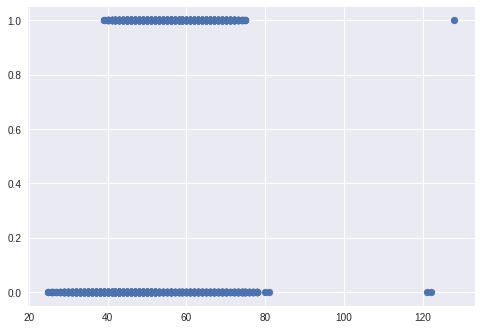

In [ ]:
# Scanning for outliers
import matplotlib.pyplot as plt
plt.scatter(all_data['Age'], all_data['Teenhome'] )

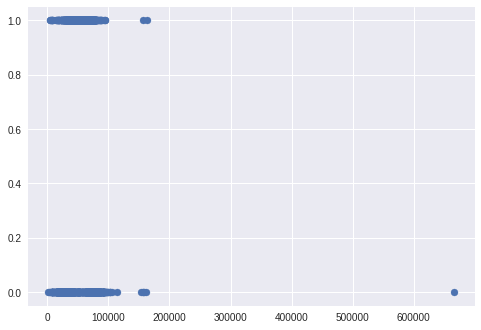

In [ ]:
plt.scatter(all_data['Income'], all_data['Teenhome'] )

In [ ]:
all_data = all_data[(all_data["Age"]<90)]
all_data = all_data[(all_data["Income"]<600000)]

# **Feature Selection**

### Correlation Matrix

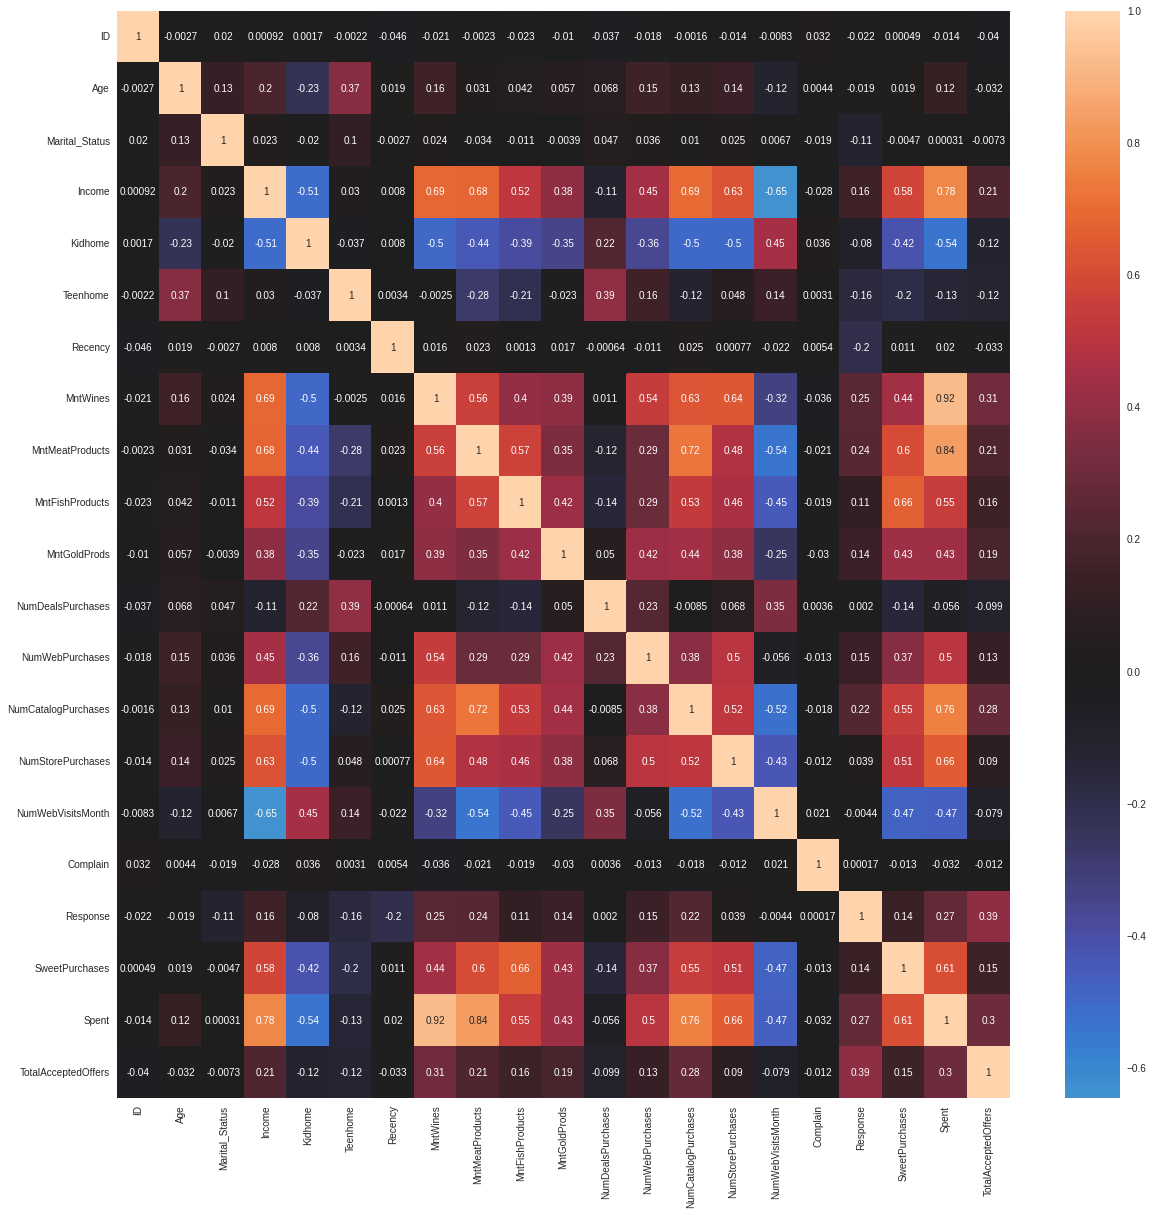

In [ ]:
#correlation matrix
import seaborn as sns
corrmat= all_data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

In [ ]:
corr_matrix = all_data.corr()
correlations = abs(corr_matrix["Teenhome"]).sort_values(ascending=False)[1:]
correlations

NumDealsPurchases      0.394803
Age                    0.368572
MntMeatProducts        0.275858
MntFishProducts        0.210854
SweetPurchases         0.195425
Response               0.161871
NumWebPurchases        0.157856
NumWebVisitsMonth      0.142853
Spent                  0.134999
TotalAcceptedOffers    0.124528
NumCatalogPurchases    0.116324
Marital_Status         0.101892
NumStorePurchases      0.048166
Kidhome                0.036687
Income                 0.029775
MntGoldProds           0.023137
Recency                0.003441
Complain               0.003146
MntWines               0.002497
ID                     0.002151
Name: Teenhome, dtype: float64

In [ ]:
# Selecting correlation features > 0.01
selectedF = correlations[correlations>0.01].index
selectedF

Index(['NumDealsPurchases', 'Age', 'MntMeatProducts', 'MntFishProducts',
       'SweetPurchases', 'Response', 'NumWebPurchases', 'NumWebVisitsMonth',
       'Spent', 'TotalAcceptedOffers', 'NumCatalogPurchases', 'Marital_Status',
       'NumStorePurchases', 'Kidhome', 'Income', 'MntGoldProds'],
      dtype='object')

In [ ]:
# selectedF.append('Teenhome')
# all_data = pd.DataFrame(all_data[selectedF], columns=selectedF)
# all_data.head()
y_all = all_data['Teenhome']
selected_data = pd.DataFrame(all_data[selectedF], columns=selectedF)
selected_data.head()

,NumDealsPurchases,Age,MntMeatProducts,MntFishProducts,SweetPurchases,Response,NumWebPurchases,NumWebVisitsMonth,Spent,TotalAcceptedOffers,NumCatalogPurchases,Marital_Status,NumStorePurchases,Kidhome,Income,MntGoldProds
0,3,64,546,172,176,1,8,7,1269,0,10,0,4,0,58138.0,88
1,2,67,6,2,2,0,1,5,18,0,1,0,2,1,46344.0,6
2,1,56,127,111,70,0,8,4,602,0,2,1,10,0,71613.0,42
3,2,37,20,10,7,0,2,6,35,0,0,1,4,1,26646.0,5
4,5,40,118,46,70,0,5,5,334,0,3,1,6,1,58293.0,15


In [ ]:
selected_data.shape

(2236, 16)

## Normalize Data

In [ ]:
# Standardization 
from sklearn.preprocessing import MinMaxScaler
columns_to_standardize = ['NumDealsPurchases', 'Age', 'MntMeatProducts',
                          'MntFishProducts','SweetPurchases','NumWebPurchases',
                          'NumWebVisitsMonth','Spent','TotalAcceptedOffers','NumCatalogPurchases',
                          'NumStorePurchases','Kidhome','Income','MntGoldProds']

selected_data[columns_to_standardize] = MinMaxScaler().fit_transform(selected_data[columns_to_standardize])
selected_data.head()

,NumDealsPurchases,Age,MntMeatProducts,MntFishProducts,SweetPurchases,Response,NumWebPurchases,NumWebVisitsMonth,Spent,TotalAcceptedOffers,NumCatalogPurchases,Marital_Status,NumStorePurchases,Kidhome,Income,MntGoldProds
0,0.200000,0.696429,0.316522,0.664093,0.465608,1,0.296296,0.35,0.565004,0.0,0.357143,0,0.307692,0.0,0.351086,0.243094
1,0.133333,0.750000,0.003478,0.007722,0.005291,0,0.037037,0.25,0.008014,0.0,0.035714,0,0.153846,0.5,0.277680,0.016575
2,0.066667,0.553571,0.073623,0.428571,0.185185,0,0.296296,0.20,0.268032,0.0,0.071429,1,0.769231,0.0,0.434956,0.116022
3,0.133333,0.214286,0.011594,0.038610,0.018519,0,0.074074,0.30,0.015583,0.0,0.000000,1,0.307692,0.5,0.155079,0.013812
4,0.333333,0.267857,0.068406,0.177606,0.185185,0,0.185185,0.25,0.148709,0.0,0.107143,1,0.461538,0.5,0.352051,0.041436


In [ ]:
processed_data = pd.concat([selected_data,y_all],axis=1)
processed_data.to_csv('processed_marketing_campaign.csv',index=False,header=True)